In [178]:
import scipy.io as sio

# load data from the .mat file:
# mat_contents = sio.loadmat('EEG_big.mat') # (EEG_data.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/EEG_big4CNN.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/EEG_big4CNN_1subj.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_noICA->0.5-38Hz,Env=1.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->0.5-38Hz,Env=1.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_ICA->0.5-38Hz,Env=1.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-48Hz,Env=1.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_FD.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/ks_2TD.mat')

# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_FD_fullspectrum.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/BCI_FD_lowspectrum.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/KOS_100Hz_ICA->1-38Hz,Env=1_FD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-100Hz,Env=1_FD')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->1-47Hz,Env=1_FD.mat')

mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->15-47Hz,Env=1_TD.mat')
# mat_contents = sio.loadmat('/home/amplifier/home/DATASETS/Merged123->15-100Hz,Env=1_TD.mat')



SHUFFLE = True
TEST_TRAIN = 0.2

KERNEL_SIZE = 20
# KERNEL_SIZE = (2,2) # is good for 3-channel FREQUENCY domain BCI data
N_KERNELS = 40

DROPOUT = (0.1, 0.2, 0.3, 0.4, 0.5)
DENSE_LEN = 10

In [179]:
# get the Dataset:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = mat_contents['X']
Y = mat_contents['Z']

if Y.shape[1] > Y.shape[0]:
    Y = Y.T
    
print('Original data shape:', X.shape)
print('Original labels shape:', Y.shape)

# verify that the model REALLY finds a mapping between the input and the labels. If we get
# our accuracy by chance, then we should get the same accuracy on a permuted dataset:
# Y = np.random.permutation(Y)


# winsize = mat_contents['winsize']
# stepsize = mat_contents['stepsize']
# trial_len = mat_contents['trial_len']
# low_cutoff = mat_contents['low_cutoff']
# high_cutoff = mat_contents['high_cutoff']
# source = mat_contents['filein']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_TRAIN, shuffle=SHUFFLE)
print('Original data type:', x_train.dtype)

# convert to float64 for numerical stability:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')

# normalize to unit variance and zero mean:
# for i in range(x_train.shape[0]):
#     x_train[i,:,:] = preprocessing.scale(x_train[i,:,:], axis=1)
#     x_train[i,:,:] = preprocessing.maxabs_scale(x_train[i,:,:], axis=1)

# for i in range(x_test.shape[0]):
#     x_test[i,:,:] = preprocessing.scale(x_test[i,:,:], axis=1)
#     x_test[i,:,:] = preprocessing.maxabs_scale(x_test[i,:,:], axis=1)

# ensure the tensors are sized right:
# if len(X.shape)==3:
#     x_train = np.expand_dims(x_train,3)
#     x_test = np.expand_dims(x_test,3)
    

# one hot encode the labels:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train)
y_test = onehot_encoder.fit_transform(y_test)

# convert to float16 to save space:
x_train = x_train.astype('float16')
y_train = y_train.astype('float16')
x_test = x_test.astype('float16')
y_test = y_test.astype('float16')
print('Normalized data type:', x_train.dtype)

chan = X.shape[1] # if you work in the FD, this is the height of the sample time-frequency image, othewise EEG channels
leng = X.shape[2] # if you work in the FD, this is the width of the sample time-frequency image, othewise time samples of EEG signal

if len(X.shape)==3:
    streams = 1 # this is EEG channels if you work with frequency domain, in the TD streams = 1
if len(X.shape)==4:
    streams = X.shape[3] # this is EEG channels if you work with frequency domain, in the TD streams = 1


print('test input shape', x_test.shape, "Nomralized MEAN:", np.mean(x_test), "min", np.min(x_test),"max", np.max(x_test))
print('train input shape', x_train.shape, "Nomralized MEAN:", np.mean(x_train), "min", np.min(x_train),"max", np.max(x_train))

print('test labels shape', y_test.shape, "Nomralized MEAN:", np.mean(y_test), "min", np.min(y_test),"max", np.max(y_test))
print('train labels shape', y_train.shape, "Nomralized MEAN:", np.mean(y_train), "min", np.min(y_train),"max", np.max(y_train))

# print('Window length', winsize)
# print('Step size:', stepsize)
# print('Trial length:', trial_len)


Original data shape: (900, 60, 250)
Original labels shape: (900, 1)
Original data type: float32
Normalized data type: float16
test input shape (180, 60, 250) Nomralized MEAN: -1.7881e-07 min -32.938 max 29.0
train input shape (720, 60, 250) Nomralized MEAN: -1.1921e-07 min -41.438 max 39.344
test labels shape (180, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0
train labels shape (720, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0


In [180]:
# we first define the autoencoder's architecture:

# make sure you don't hog all the video memory
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
from keras import backend as K
K.set_session(sess)
###################################

from keras.layers import Input, Dense, Conv2D, Conv1D, MaxPooling1D, MaxPooling2D, Dropout, BatchNormalization, Flatten
from keras.models import Model
from keras.models import load_model
from keras.callbacks import TensorBoard, EarlyStopping
from keras import optimizers
from keras.initializers import Orthogonal as orth

import numpy as np
import matplotlib.pyplot as plt

def conv_net(leng):
    print(leng)
    input_img = Input(shape=(chan, leng))  # adapt this if using `channels_first` image
    input_norm = BatchNormalization(axis=1)(input_img)
    e1 = Conv1D(N_KERNELS, KERNEL_SIZE, activation='relu', padding='same',
                                    kernel_initializer = orth(gain=1.0, seed=None))(input_norm)
#     e2 = MaxPooling2D(POOL_SIZE, padding='same')(e1)
    e2 = MaxPooling1D()(e1)
    e2b = BatchNormalization(axis=1)(e2)
    e2a = Dropout(DROPOUT[0])(e2b)
    e3 = Conv1D(N_KERNELS*2, KERNEL_SIZE, activation='relu', padding='same',
                                    kernel_initializer = orth(gain=1.0, seed=None))(e2a)
#     e4 = MaxPooling2D(POOL_SIZE, padding='same')(e3)
    e4 = MaxPooling1D()(e3)
    e4b = BatchNormalization(axis=1)(e4)
    e4a = Dropout(DROPOUT[1])(e4b)
    e5 = Conv1D(N_KERNELS*4, KERNEL_SIZE, activation='relu', padding='same',
                                    kernel_initializer = orth(gain=1.0, seed=None))(e4a)
#     e6 = MaxPooling2D(POOL_SIZE, padding='same')(e5)
    e6 = MaxPooling1D()(e5)
    e6b = BatchNormalization(axis=1)(e6)
    e6a = Dropout(DROPOUT[2])(e6b)
    e7 = Conv1D(N_KERNELS*8, KERNEL_SIZE, activation='relu', padding='same',
                                    kernel_initializer = orth(gain=1.0, seed=None))(e6a)
#     e8 = MaxPooling2D(POOL_SIZE, padding='same')(e7)
    e8 = MaxPooling1D()(e7)
    e9 = Dropout(DROPOUT[3])(e8)
    e9b = Conv1D(N_KERNELS*16, KERNEL_SIZE, activation='relu', padding='same',
                                    kernel_initializer = orth(gain=1.0, seed=None))(e9)
    e10 = Flatten()(e9b)
    e10b = BatchNormalization(axis=1)(e10)
    e11 = Dense(DENSE_LEN, activation='sigmoid',
                                     kernel_initializer = orth(gain=1.0, seed=None))(e10b)
    e12 = Dropout(DROPOUT[4])(e11)
    e12b = BatchNormalization(axis=1)(e12)
    e13 = Dense(2, activation='softmax')(e12b)

    return Model(input_img, e13)

In [182]:
# define input to the model:
x = Input(shape=(chan, leng, streams))

# make the model:
model = conv_net(leng)

# compile the model:
# sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.95, nesterov=True)
# model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# model.compile(optimizer='rmsprop', loss=correlation_coefficient_loss)
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])


# SEE INSIDE THE MODEL:
# conv_net().summary() #or
model.summary()

250
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        (None, 60, 250)           0         
_________________________________________________________________
batch_normalization_114 (Bat (None, 60, 250)           240       
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 60, 40)            200040    
_________________________________________________________________
max_pooling1d_79 (MaxPooling (None, 30, 40)            0         
_________________________________________________________________
batch_normalization_115 (Bat (None, 30, 40)            120       
_________________________________________________________________
dropout_92 (Dropout)         (None, 30, 40)            0         
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 30, 80)            64080     
______

In [183]:
##########################################################

# Training time!
# Try 20 epochs using batch size = 3, then switch to 4
from keras.callbacks import TensorBoard, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min')

train_history = model.fit(x_train, y_train,
                epochs=1000,
                batch_size=40,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[TensorBoard(log_dir='/home/amplifier/home/CNN_stim'), early_stopping])

# save the entire model and the weights after the training:
model.save('/home/amplifier/home/NEW_DL/models/EEGnet.h5')
model.save_weights('/home/amplifier/home/NEW_DL/weights/EEGnet_weights.h5')

Train on 720 samples, validate on 180 samples
Epoch 1/1000
720/720 [==============================] - 3s 4ms/step - loss: 1.0091 - acc: 0.5236 - val_loss: 0.7448 - val_acc: 0.5500
Epoch 2/1000
720/720 [==============================] - 1s 1ms/step - loss: 0.8175 - acc: 0.5917 - val_loss: 0.7715 - val_acc: 0.4778
Epoch 3/1000
720/720 [==============================] - 1s 1ms/step - loss: 0.7313 - acc: 0.6472 - val_loss: 0.9024 - val_acc: 0.5056
Epoch 4/1000
720/720 [==============================] - 1s 1ms/step - loss: 0.5116 - acc: 0.7736 - val_loss: 1.1931 - val_acc: 0.4833
Epoch 5/1000
720/720 [==============================] - 1s 1ms/step - loss: 0.4602 - acc: 0.8278 - val_loss: 1.3076 - val_acc: 0.4778
Epoch 6/1000
720/720 [==============================] - 1s 1ms/step - loss: 0.2954 - acc: 0.8986 - val_loss: 1.1511 - val_acc: 0.5722
Epoch 7/1000
720/720 [==============================] - 1s 1ms/step - loss: 0.2328 - acc: 0.9389 - val_loss: 1.0698 - val_acc: 0.5667
Epoch 8/1000
720

In [184]:
# let's predict a TRAINING sammple:
decoded_train = model.predict(x_train)
decoded_test = model.predict(x_test)
print(decoded_train.shape)
print(decoded_test.shape)

(720, 2)
(180, 2)


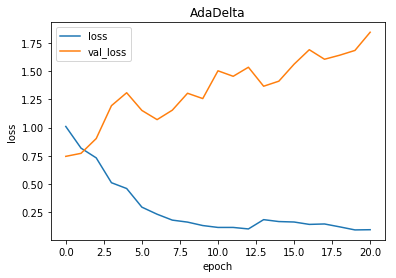

In [185]:
#####################################################

# print(np.array(history.losses))
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.title('AdaDelta')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [186]:
##########################################################

# now test sample by sample
cor_test = []
L = x_test.shape
for sample_no in range(x_test.shape[0]):
    pred = model.predict(np.expand_dims(x_test[sample_no],0))
    if ((pred[0][0]<pred[0][1]) and (y_test[sample_no,0] < y_test[sample_no,1]) or
       ((pred[0][0]>pred[0][1]) & (y_test[sample_no,0] > y_test[sample_no,1]))):
        cor_test.append(1)
    else:
        cor_test.append(0)

cor_train = []
L = x_train.shape
for sample_no in range(x_train.shape[0]):
    pred = model.predict(np.expand_dims(x_train[sample_no],0))
    if ((pred[0][0]<pred[0][1]) and (y_train[sample_no,0] < y_train[sample_no,1]) or
       ((pred[0][0]>pred[0][1]) & (y_train[sample_no,0] > y_train[sample_no,1]))):
        cor_train.append(1)
    else:
        cor_train.append(0)

# Report accuracies
print('Accuracy on the test data:', np.mean(cor_test))
print('Accuracy on the training data:', np.mean(cor_train))

Accuracy on the test data: 0.538888888889
Accuracy on the training data: 0.993055555556


In [177]:
# Visualize a few kernels from the first convolutional layer:
# enc.layers[2].get_config()
# dir(enc.layers[2])
x = model.layers[2].get_weights()
print ('Layer number:', 2, 'Layer name:', model.layers[2].name)
sh = x[0].shape
print(sh) # kernel length x input channels x output channels

c = 0
fig, axs = plt.subplots(sh[2],sh[3])
fig.set_size_inches(18.5, 10.5)
axs = axs.ravel()
for i in range(sh[2]):
    for j in range(sh[3]):
        axs[c].imshow(x[0][:,:,i,j])
        axs[c].get_xaxis().set_visible(False)
        axs[c].get_yaxis().set_visible(False)        
        axs[c].set_title(str(i)+str(j))
        c = c + 1
plt.suptitle(('Convolution kernels in layer ' + model.layers[2].name), fontsize=16)

Layer number: 2 Layer name: conv1d_87
(20, 500, 6)


IndexError: tuple index out of range

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))